# The Sparks Foundation- GRIP-Data Science and Business Analytics-Oct-2021

Author :- Anand Bhausaheb Kharabe

Task-1 :-Prediction Using Supervised ML

Level  :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset :- http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the csv file of student_scores.csv store it into variable name called tsftask1

In [6]:
tsftask1 = pd.read_csv("student_scores.csv")
tsftask1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratary Data Analysis  

In [3]:
tsftask1.head(5) # Shows first five rows of the data from variable tsftask1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
tsftask1.tail(5)# Shows last five rows of the data from variable tsftask1

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
tsftask1.shape # Shows the shape of the data in tuple format

(25, 2)

In [8]:
tsftask1.isna().sum()# Check whether data contain NA value

Hours     0
Scores    0
dtype: int64

In [9]:
tsftask1.info()# shows the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization

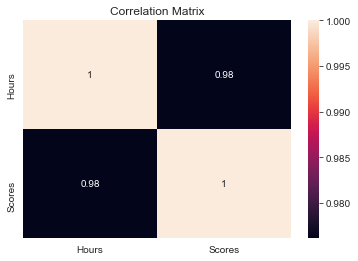

In [14]:
sns.set_style('whitegrid')
sns.heatmap(tsftask1.corr(), annot=True)
plt.title('Correlation Matrix');

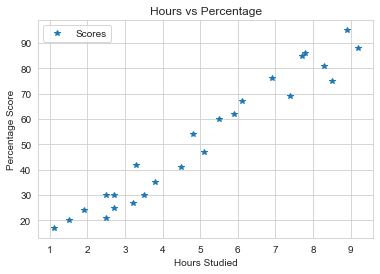

In [15]:
tsftask1.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Hours of student studies is directly proportional to its percentage score

There is a strong positive corelation between the hours of student studied and the percentage score

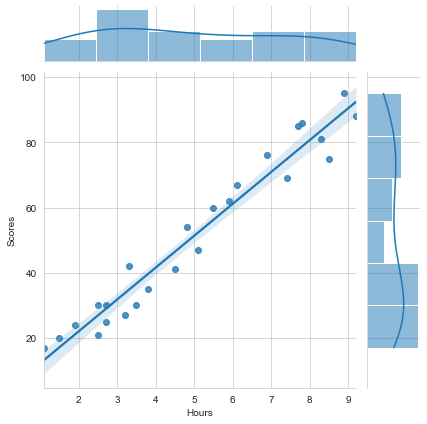

In [30]:
sns.jointplot('Hours','Scores',data=tsftask1,kind='reg');

In the scatter plot X-axis is Hours of student studies and Y-axis is Percentage score

The above plot show the linear regression fit (using kind='reg')

# Spliting the dataset as Independent variable X = Hours and Dependent variable Y = Scores

In [32]:
X = tsftask1.iloc[:, :-1].values
y = tsftask1.iloc[:, 1].values

In [33]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [34]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Spliting the Dataset into train dataset and test dataset

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [36]:
X_train.shape

(18, 1)

In [37]:
y_train.shape

(18,)

In [38]:
X_test.shape

(7, 1)

In [39]:
y_test.shape

(7,)

# Model Building using Supervised Learning

In [40]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Hrs':[i[0] for i in X_test], 'Predicted Marks':[k for k in y_pred]})
prediction

,Hrs,Predicted Marks
0,6.1,60.674362
1,1.9,19.997923
2,4.5,45.178576
3,6.9,68.422255
4,8.9,87.791989
5,2.5,25.808842
6,3.3,33.556736


In [42]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks':y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,67,60.674362
1,24,19.997923
2,41,45.178576
3,76,68.422255
4,95,87.791989
5,30,25.808842
6,42,33.556736


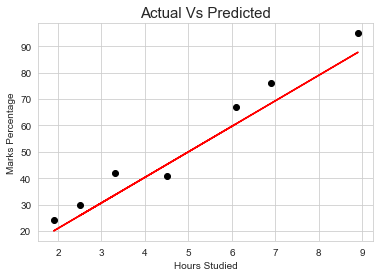

In [43]:
plt.scatter(x=X_test,y=y_test,color='black')
plt.plot(X_test,y_pred,color='red')
plt.title('Actual Vs Predicted',size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours Studied',size=10)
plt.show()

# Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,r2_score

In [45]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  5.989495552434456


In [46]:
print('R2 Score is :',r2_score(y_test,y_pred))

R2 Score is : 0.9340752536504426


In [47]:
hrs = [9.25]
answer = regressor.predict([hrs])
print("Score = {}".format(round(answer[0],3)))

Score = 91.182


# In the above Output when student study for 9.25 Hours/Day then student is scoring 91.182